# Group 1 Capstone Project Work
### Make sure to make / checkout your own branch before making changes

# Maddie Hince

In [177]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('zippedData/im.db')

In [178]:
ratings_df = pd.read_sql("""SELECT movie_ratings.movie_id, movie_ratings.averagerating, movie_ratings.numvotes, movie_basics.primary_title, movie_basics.start_year, movie_basics.genres 
                            FROM movie_ratings
                            JOIN movie_basics USING(movie_id)
                            WHERE movie_basics.start_year >= 2010""", conn)

In [189]:
ratings_df.dropna(how='any', axis=0, inplace=True)

In [190]:
sorted_by_avg = ratings_df.groupby('genres').mean().sort_values(by='averagerating', ascending=False)
# filter out genres with less than 62 votes
sorted_by_avg['numvotes'].describe()

count       923.000000
mean       4378.464914
std       13265.696554
min           5.000000
25%          62.250000
50%         322.200000
75%        2469.010861
max      181285.417323
Name: numvotes, dtype: float64

In [208]:
# 15 highest-rated movie genres with more than 62 total votes
sorted_avg_higher_votes = sorted_by_avg[sorted_by_avg['numvotes'] >= 62].head(15)
sorted_avg_higher_votes.reset_index(inplace=True)

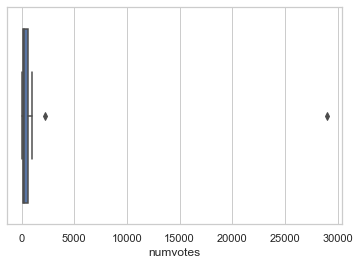

In [209]:
# visualizations
import seaborn as sns
sns.set_theme(style = 'whitegrid')

# need to clean up this box plot for readibility
sns.boxplot(x = sorted_avg_higher_votes['numvotes']);

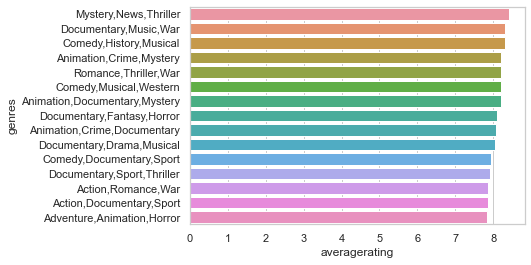

In [213]:
# bar chart for movie ratings
# need to clean this one up as well
sns.barplot(x = 'averagerating', y = 'genres', data=sorted_avg_higher_votes);

# Cat Murad

# Elijah Soba

# Luis Estrada 

# Kilmar Lazo 

# Michael Eugene